# Implementasi K-Means Clustering (Tugas 5)


1.   Baca data bunga *iris*
2.   Implementasi algoritma Naive Bayes Gaussian untuk menentukan probabilitas kelas dari data tes

## Baca Data 


*   Baca data dengan *library pandas* *italicized text*
*   Data [Bunga Iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)
* Hitungan [Data Manual](https://docs.google.com/spreadsheets/d/1gtVhWPbcMpFuJ0KN9OSty9330yiDiIQH/edit?usp=sharing&ouid=104778244268493691619&rtpof=true&sd=true)

#### Persiapan Lingkungan


*   Impor *train_test_split* dari *sklearn*
*   Impor *KNeighborsClassifier* dari *sklearn*
*   Impor *pandas library*

In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
dataset_url = ('https://raw.githubusercontent.com/rahadis/datamining/main/train.csv')

In [3]:
df = pd.read_csv(dataset_url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#check number of rows and columns in dataset
df.shape

(2000, 21)

### Hitung Data

*   Pisahkan *feature* "variety" dari *dataframe*
*   Tentukan nilai **K** atau *centroid*
*   Hitung jarak data terhadap *centroid*
*   Hitung rata-rata data per-*cluster*

In [5]:
# delete 'variety' column
df_without_label = df.drop(columns=["price_range"])
df_without_label

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [6]:
# separate target 

# values
X=df.iloc[:,0:4].values

# 
y = df.values[:,4]

In [7]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(y)

In [8]:
labels

array([1, 0, 2, ..., 1, 4, 5])

In [9]:
# data_tes = np.array(labels)
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=1)
kmeans.fit(X)
# kmeans.labels_
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

In [10]:
centroids

array([[1.67250693e+03, 4.97690531e-01, 1.53060046e+00, 4.93071594e-01],
       [6.85393258e+02, 4.86891386e-01, 1.47734082e+00, 5.48689139e-01],
       [1.10441000e+03, 4.98333333e-01, 1.55016667e+00, 4.98333333e-01]])

In [11]:
df = pd.DataFrame(labels, columns=["Label"])

In [12]:
df

,Label
0,1
1,2
2,1
3,1
4,0
...,...
1995,1
1996,0
1997,0
1998,0


In [13]:
from sklearn.decomposition import PCA
pca = PCA()
# pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [ ]:
X_new

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

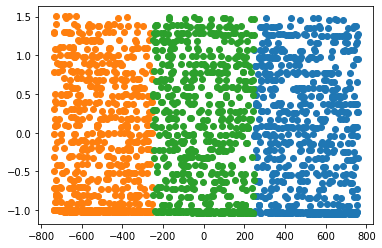

In [14]:
# retrieve unique clusters
clusters = unique(labels)
# fit the model
kmeans.fit(X)
# assign a cluster to each example
yhat = kmeans.predict(X)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1])
# show the plot
pyplot.show()